In [3]:
import sqlite3

In [157]:
con = sqlite3.connect("mydb.db")


In [149]:
conn

In [158]:
table_creation_query="""
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [159]:
table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [160]:
table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [161]:
cursor=con.cursor()


In [162]:
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [163]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [164]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [165]:
cursor.executemany(insert_query,employee_data)
cursor.executemany(insert_query_customers,customers_data)
cursor.executemany(insert_query_orders,orders_data)

In [166]:
con.commit()


In [168]:
cursor = con.execute("SELECT * FROM employees;")
for row in cursor:
    print(row)

(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0)
(2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0)
(3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0)
(4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)


In [ ]:
# Install the langchain-community package
%pip install langchain-community

# Import the SQLDatabase module
# from langchain_community.utilities import SQLDatabase

In [14]:
from langchain_community.utilities import SQLDatabase

In [169]:
db= SQLDatabase.from_uri("sqlite:///mydb.db")

In [170]:
db.get_usable_table_names()

['customers', 'employees', 'orders']

In [171]:
db.get_table_info(['employees'])


'\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/'

In [172]:
from dotenv import load_dotenv
load_dotenv()

True

In [173]:
from langchain_groq import ChatGroq
llm= ChatGroq(model="llama-3.1-8b-instant")

In [21]:
messages = [
    ("system", "You are a Chatbot that can answer questions"),
    ("human", "who won IPL 2022?"),
]
llm.invoke(messages)

AIMessage(content='The Gujarat Titans (GT) won the IPL 2022. They defeated the Rajasthan Royals (RR) in the final, which took place on May 29, 2022, at the Narendra Modi Stadium in Ahmedabad. It was the inaugural season of the team, and they won the championship in their first year of existence.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 51, 'total_tokens': 119, 'completion_time': 0.128585099, 'prompt_time': 0.002668281, 'queue_time': 0.046513369, 'total_time': 0.13125338}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--33522403-dc20-4bf1-8f08-1e6c760be687-0', usage_metadata={'input_tokens': 51, 'output_tokens': 68, 'total_tokens': 119})

In [174]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [175]:
toolkit= SQLDatabaseToolkit(db=db, llm=llm)
tools=toolkit.get_tools()
for tool in tools:
    print(tool.name, tool.description)

sql_db_query Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.
sql_db_schema Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3
sql_db_list_tables Input is an empty string, output is a comma-separated list of tables in the database.
sql_db_query_checker Use this tool to double check if your query is correct before executing it. Always use this tool before executing a query with sql_db_query!


In [176]:
list_table=next((tool for tool in tools if tool.name == "sql_db_list_tables"),None)
list_table.invoke('{customer}')

'customers, employees, orders'

In [178]:
schema=next((tool for tool in tools if tool.name == "sql_db_schema"),None)
schema.invoke('customers')

'\nCREATE TABLE customers (\n\tcustomer_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\tphone TEXT, \n\tPRIMARY KEY (customer_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from customers table:\ncustomer_id\tfirst_name\tlast_name\temail\tphone\n1\tJohn\tDoe\tjohn.doe@example.com\t1234567890\n2\tJane\tSmith\tjane.smith@example.com\t9876543210\n3\tEmily\tDavis\temily.davis@example.com\t4567891230\n*/'

In [27]:
from langchain_core.tools import tool
@tool
def db_query_tool(query : str)-> str:
    """Execute the SQL Query and return the result.
    If the query is not valid, return an error message.
    In case of an error, user is advised to rewrite the query.
    """
    try:
        result = db.run_no_throw(query)
        return result
    except Exception as e:
        return f"Error executing query: {str(e)}. Please rewrite the query."
    

In [179]:
from langchain.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///mydb.db")

# Instead of db.run(), use:
result = db.run("SELECT * FROM employees;")
print(result)

[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]


In [82]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode


In [92]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
 - Using NOT IN with NULL values
 - Using UNION when UNION ALL should have been used
 - Using BETWEEN for exclusive ranges
 - Data type mismatch in predicates
 - Properly quoting identifiers
 - Using the correct number of arguments for functions
 - Casting to the correct data type
 - Using the proper columns for joins
 - Always use single quotes for string literals in SQL queries.
 - Avoid ending the query with an unmatched quote.   

If there are any of the above mistakes, rewrite the query. If there are no mistakes, just reproduce the original query.

You will call the appropriate tool to execute the query after running this check."""

query_check_prompt = ChatPromptTemplate.from_messages(
    [("system", query_check_system), ("placeholder", "{messages}")]
)

query_check = query_check_prompt | llm.bind_tools([db_query_tool])

In [183]:
query_check.invoke({"messages": [("user", "SELECT * FROM customers LIMIT 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zyas', 'function': {'arguments': '{"query":"SELECT * FROM \\"customers\\" LIMIT 5;"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 431, 'total_tokens': 464, 'completion_time': 0.056729135, 'prompt_time': 0.025643691, 'queue_time': 0.046574639, 'total_time': 0.082372826}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5cd34f83-a906-4b60-959a-9bfd2e9cfc38-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM "customers" LIMIT 5;'}, 'id': 'call_zyas', 'type': 'tool_call'}], usage_metadata={'input_tokens': 431, 'output_tokens': 33, 'total_tokens': 464})

In [292]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user, based on the user query"""
    final_answer: str = Field(..., description="The final answer to submit to the user.")

    
# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.

Your task is to generate a syntactically correct **SQLite** query that answers the given user question, using only the tables and columns explicitly mentioned in the provided database schema.

### IMPORTANT RULES:

- 🧠 **Query Writing Guidelines**:
  - Use **only the tables and columns** shown in the schema above.
  - Do **not query all columns** (avoid `SELECT *`) unless explicitly required. Use only relevant columns.
  - If the user doesn't specify a count, limit results to **5 rows maximum** using `LIMIT 5`.
  - You may use `ORDER BY` to make the result more relevant or insightful.
  - Do **not** make any **DML or DDL statements** like `INSERT`, `UPDATE`, `DELETE`, `DROP`.

- ⚠️ **Error Handling**:
  - If you hit a syntax or execution error while running the query, revise and retry.
  - If the query returns **no results**, rewrite it to yield a meaningful output.
  - If there is not enough information to write a valid query (e.g. missing filters or ambiguous table), clearly say:
    `"I don't have enough information to answer that."`


If the question requires retrieving actual values from the database (like highest amount, counts, names), generate a SQL query to get those values.

Otherwise, DO NOT guess the answer — generate a SQL query to get it.

Strictly Output only SQL Query
"""

query_gen_prompt = ChatPromptTemplate.from_messages(
    [("system", query_gen_system), ("placeholder", "{messages}")]
)

query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])


In [293]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)


In [294]:
get_schema_tool.invoke("employees")

'\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/'

In [295]:
llm_to_get_schema=llm.bind_tools([get_schema_tool])
list_tables_tool.invoke("")


'customers, employees, orders'

In [296]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [297]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [298]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

In [299]:
def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [300]:
def check_the_given_query(state:State):
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}

In [301]:
def generation_query(state: State):
    # Extract latest human message
    user_msg = next((m for m in reversed(state["messages"]) if m.type == "human"), None)

    # Extract tool messages from earlier nodes
    table_msg = next((m for m in reversed(state["messages"])
                      if isinstance(m, ToolMessage) and m.name == "sql_db_list_tables"), None)
    schema_msg = next((m for m in reversed(state["messages"])
                       if isinstance(m, ToolMessage) and m.name == "sql_db_schema"), None)

    # Construct enriched prompt
    full_context = []

    if table_msg:
        full_context.append(
            AIMessage(content=f"Here are the available tables in the database:\n\n{table_msg.content}")
        )

    if schema_msg:
        # ✅ Clean schema content by removing sample rows
        cleaned_schema = schema_msg.content.split("/*")[0].strip()
        full_context.append(
            AIMessage(content=f"Here is the schema of the relevant tables:\n\n{cleaned_schema}")
        )

    if user_msg:
        full_context.append(user_msg)

    

    # DEBUG: Show injected context
    print("\n🧠 QUERY_GEN CONTEXT:")
    for msg in full_context:
        print(f"{msg.type.upper()}: {msg.content.strip()[:300]}...\n")

    # Run the LLM to generate the query
    message = query_gen.invoke({"messages": full_context})

    # Check if LLM incorrectly called a non-approved tool
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=(
                            f"Error: The wrong tool was called: {tc['name']}. "
                            f"Please fix your mistakes. Remember to only call SubmitFinalAnswer "
                            f"to submit the final answer. Generated queries should be outputted "
                            f"WITHOUT a tool call."
                        ),
                        tool_call_id=tc["id"],
                    )
                )

    return {"messages": [message] + tool_messages}


In [302]:
def should_continue(state:State):
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [303]:
def llm_get_schema(state:State):
    print("this is my state", state)
    response = llm_to_get_schema.invoke(state["messages"])
    return {"messages": [response]}

In [304]:
list_tables=create_node_from_tool_with_fallback([list_tables_tool])


In [305]:
get_schema=create_node_from_tool_with_fallback([get_schema_tool])


In [306]:
query_database=create_node_from_tool_with_fallback([db_query_tool])


In [307]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


In [308]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", list_tables)
workflow.add_node("get_schema_tool", get_schema)
workflow.add_node("model_get_schema", llm_get_schema)
workflow.add_node("query_gen", generation_query)
workflow.add_node("correct_query", check_the_given_query)
workflow.add_node("execute_query", query_database)

In [309]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [310]:
app=workflow.compile()


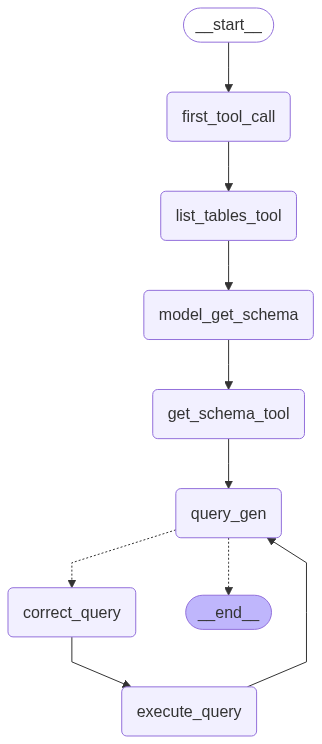

In [311]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [312]:
query={"messages": [("user", "List all the users")]}
for step in app.stream(query):
    print("🔄 Step:", step)
# response=app.invoke(query)

🔄 Step: {'first_tool_call': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={}, id='7c6f17f8-61e3-4633-985c-a5c9b8d1a6d8', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}])]}}
🔄 Step: {'list_tables_tool': {'messages': [ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='790491fb-ebe1-4ed5-9e5e-1dec27831bba', tool_call_id='tool_abcd123')]}}
this is my state {'messages': [HumanMessage(content='List all the users', additional_kwargs={}, response_metadata={}, id='32af1191-827d-4e9b-896a-4a0a8d4c04b0'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='7c6f17f8-61e3-4633-985c-a5c9b8d1a6d8', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='790491fb-ebe1-4ed5-9e5e-1dec27831bba', tool_call_id='tool_abcd123')]}
🔄 Step: {'model_get_sche

In [141]:
from langchain_core.messages import BaseMessage, HumanMessage


In [207]:
llm_to_get_schema.invoke([HumanMessage(content='List all customer with their email', additional_kwargs={}, response_metadata={}, id='0571873a-df8f-4673-942c-ea73a052f7d6'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='bcaf622f-b11e-4502-b5ef-0b784bc5bdf1', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='a48f6154-23de-47f0-887c-2888405ced08', tool_call_id='tool_abcd123')])


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_17gw', 'function': {'arguments': '{"table_names":"customers,employees,orders"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 366, 'total_tokens': 387, 'completion_time': 0.028, 'prompt_time': 0.021652021, 'queue_time': 0.044962868999999996, 'total_time': 0.049652021}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_55d70a61e4', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4e26c404-ee79-477c-af3f-93bc72058162-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'customers,employees,orders'}, 'id': 'call_17gw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 366, 'output_tokens': 21, 'total_tokens': 387})

In [320]:
query={"messages": [("user", "Show all customers whose email contains 'example.com'")]}
for step in app.stream(query):
    print("🔄 Step:", step)
    if "query_gen" in step:
        msg = step["query_gen"]["messages"][-1]
        print("🧠 QUERY_GEN output:", msg.content or msg.tool_calls)


🔄 Step: {'first_tool_call': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={}, id='eeb6de88-e0d4-440c-964b-1393b95d5cae', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}])]}}
🔄 Step: {'list_tables_tool': {'messages': [ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='0e6212df-ce01-40d3-9338-32f54f539def', tool_call_id='tool_abcd123')]}}
this is my state {'messages': [HumanMessage(content="Show all customers whose email contains 'example.com'", additional_kwargs={}, response_metadata={}, id='ac8fcd8a-648f-4898-8417-0cc4a0acda83'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='eeb6de88-e0d4-440c-964b-1393b95d5cae', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='0e6212df-ce01-40d3-9338-32f54f539def', tool_call_id='tool_a

In [322]:
print("Notebook updated: June 7, 2025")


Notebook updated: June 7, 2025


In [321]:
sql_query = msg.tool_calls[0]['args']['final_answer']
print("🧾 Executing:", sql_query)
result = db.run(sql_query)
print(result)


🧾 Executing: SELECT * FROM customers WHERE email LIKE '%example.com';
[(1, 'John', 'Doe', 'john.doe@example.com', '1234567890'), (2, 'Jane', 'Smith', 'jane.smith@example.com', '9876543210'), (3, 'Emily', 'Davis', 'emily.davis@example.com', '4567891230'), (4, 'Michael', 'Brown', 'michael.brown@example.com', '7894561230')]
